# Import Library

In [1]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                           precision_score, recall_score, f1_score,
                           roc_curve, precision_recall_curve)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
import joblib
import numpy as np
import shap
from itertools import cycle
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc


Mengimpor semua library yang diperlukan untuk analisis data, visualisasi, dan machine learning. Library utama meliputi pandas untuk manipulasi data, seaborn/matplotlib untuk visualisasi, dan sklearn untuk machine learning.

#load dataset

In [2]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/data_cuaca.csv', delimiter=';')


Mounted at /content/drive


 Memuat dataset cuaca dari Google Drive. Dataset berisi 719 baris data dengan 9 kolom: Tahun, Bulan, Tanggal, suhu minimum, suhu maksimum, suhu rata-rata, kelembaban rata-rata, curah hujan (ch), dan jam cahaya.

## Exploratory Data Analysis (EDA)

In [3]:
data

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
0,2022,1,1,24.0,32.2,27.0,84.0,1.0,3.5
1,2022,1,2,24.0,31.2,25.8,91.0,8.1,2.5
2,2022,1,3,22.4,32.0,26.3,86.0,29.3,2.0
3,2022,1,4,24.0,29.8,26.7,87.0,0.5,5.5
4,2022,1,5,23.4,32.2,26.9,85.0,22.3,0.0
...,...,...,...,...,...,...,...,...,...
714,2023,12,16,24.2,33.2,29.9,77.0,0.0,5.7
715,2023,12,17,24.8,35.0,30.6,72.0,7.3,0.4
716,2023,12,18,24.0,33.6,29.9,77.0,25.4,6.2
717,2023,12,19,23.4,34.4,31.0,71.0,1.3,6.1


In [4]:
data.describe()

,Thn,bln,tgl,temp_min,temp_max,temp_rata-rata,lembab_rata-rata,ch,cahaya_jam
count,719.00000,719.000000,719.000000,718.000000,715.000000,716.000000,716.000000,716.000000,717.000000
mean,2022.49235,6.442281,15.563282,37.401950,46.165734,27.206285,83.681564,998.574441,32.383821
std,0.50029,3.408852,8.767571,372.284493,372.741102,1.459084,6.636348,2800.073672,527.495165
min,2022.00000,1.000000,1.000000,18.200000,20.000000,23.700000,57.000000,0.000000,0.000000
25%,2022.00000,3.500000,8.000000,23.200000,31.200000,26.300000,80.000000,0.000000,2.300000
50%,2022.00000,6.000000,15.000000,23.800000,32.400000,27.000000,84.000000,1.400000,4.400000
75%,2023.00000,9.000000,23.000000,24.400000,33.350000,27.900000,88.000000,12.350000,6.700000
max,2023.00000,12.000000,31.000000,9999.000000,9999.000000,32.800000,99.000000,8888.000000,9999.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Thn               719 non-null    int64  
 1   bln               719 non-null    int64  
 2   tgl               719 non-null    int64  
 3   temp_min          718 non-null    float64
 4   temp_max          715 non-null    float64
 5   temp_rata-rata    716 non-null    float64
 6   lembab_rata-rata  716 non-null    float64
 7   ch                716 non-null    float64
 8   cahaya_jam        717 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 50.7 KB


Dataset memiliki 719 record dari 2022-2023
Terdapat beberapa missing values di berbagai kolom
Ditemukan nilai anomali seperti 9999 dan 8888 yang kemungkinan adalah kode untuk data yang hilang
Suhu berkisar 23-32°C, kelembaban 57-99%, curah hujan 0-8888mm

# Handle missing values, outliers dan dupikat

## Replace invalid values with NaN

In [6]:
data.replace([9999, 8888], pd.NA, inplace=True)


Mengganti nilai anomali (9999, 8888) dengan NaN

## Check missing values per column

In [7]:
missing_per_column = data.isnull().sum()
print(missing_per_column[missing_per_column > 0])


temp_min             2
temp_max             5
temp_rata-rata       3
lembab_rata-rata     3
ch                  83
cahaya_jam           4
dtype: int64


In [8]:
## Imputation missing values with median
data['temp_min'].fillna(data['temp_min'].median(), inplace=True)
data['temp_max'].fillna(data['temp_max'].median(), inplace=True)
data['temp_rata-rata'].fillna(data['temp_rata-rata'].median(), inplace=True)
data['lembab_rata-rata'].fillna(data['lembab_rata-rata'].median(), inplace=True)
data['ch'].fillna(data['ch'].median(), inplace=True)
data['cahaya_jam'].fillna(data['cahaya_jam'].median(), inplace=True)


<ipython-input-8-75c93c1fa58e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['temp_min'].fillna(data['temp_min'].median(), inplace=True)
<ipython-input-8-75c93c1fa58e>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['temp_min'].fillna(data['temp_min'].median(), inplace=True)
<ipython-input-8-75c93

Menggunakan median untuk mengisi missing values karena lebih robust terhadap outliers
Kolom 'ch' (curah hujan) memiliki missing values terbanyak (83 nilai)

## Feature selection

In [9]:
fitur = ['temp_min', 'temp_max', 'temp_rata-rata', 'lembab_rata-rata', 'ch', 'cahaya_jam']
numerik_cols = fitur.copy()


##Outlier detection

In [10]:
for col in numerik_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Kolom: {col}\nJumlah outlier: {len(outliers)}\n{'='*40}")


Kolom: temp_min
Jumlah outlier: 59
Kolom: temp_max
Jumlah outlier: 26
Kolom: temp_rata-rata
Jumlah outlier: 38
Kolom: lembab_rata-rata
Jumlah outlier: 21
Kolom: ch
Jumlah outlier: 103
Kolom: cahaya_jam
Jumlah outlier: 0


Hasil Outliers:

temp_min: 59 outliers
temp_max: 26 outliers
temp_rata-rata: 38 outliers
lembab_rata-rata: 21 outliers
ch: 103 outliers (terbanyak)
cahaya_jam: 0 outliers

## Visualization

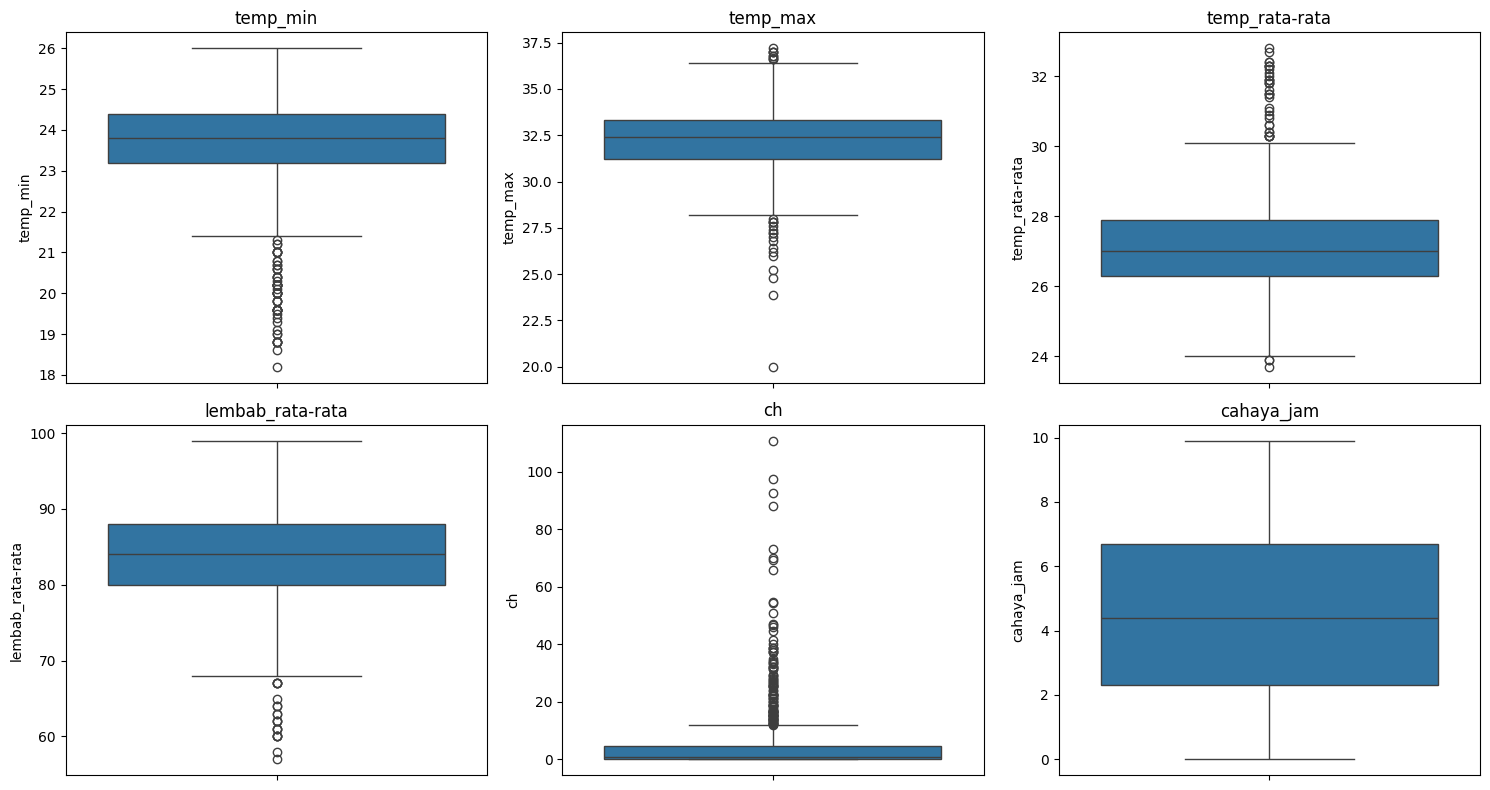

In [11]:
# Boxplots per feature
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerik_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=data[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.show()


Boxplot menunjukkan distribusi dan outliers untuk setiap variabel. Curah hujan (ch) memiliki distribusi yang sangat skewed dengan banyak outliers di nilai tinggi, menunjukkan kejadian hujan ekstrem yang jarang terjadi.


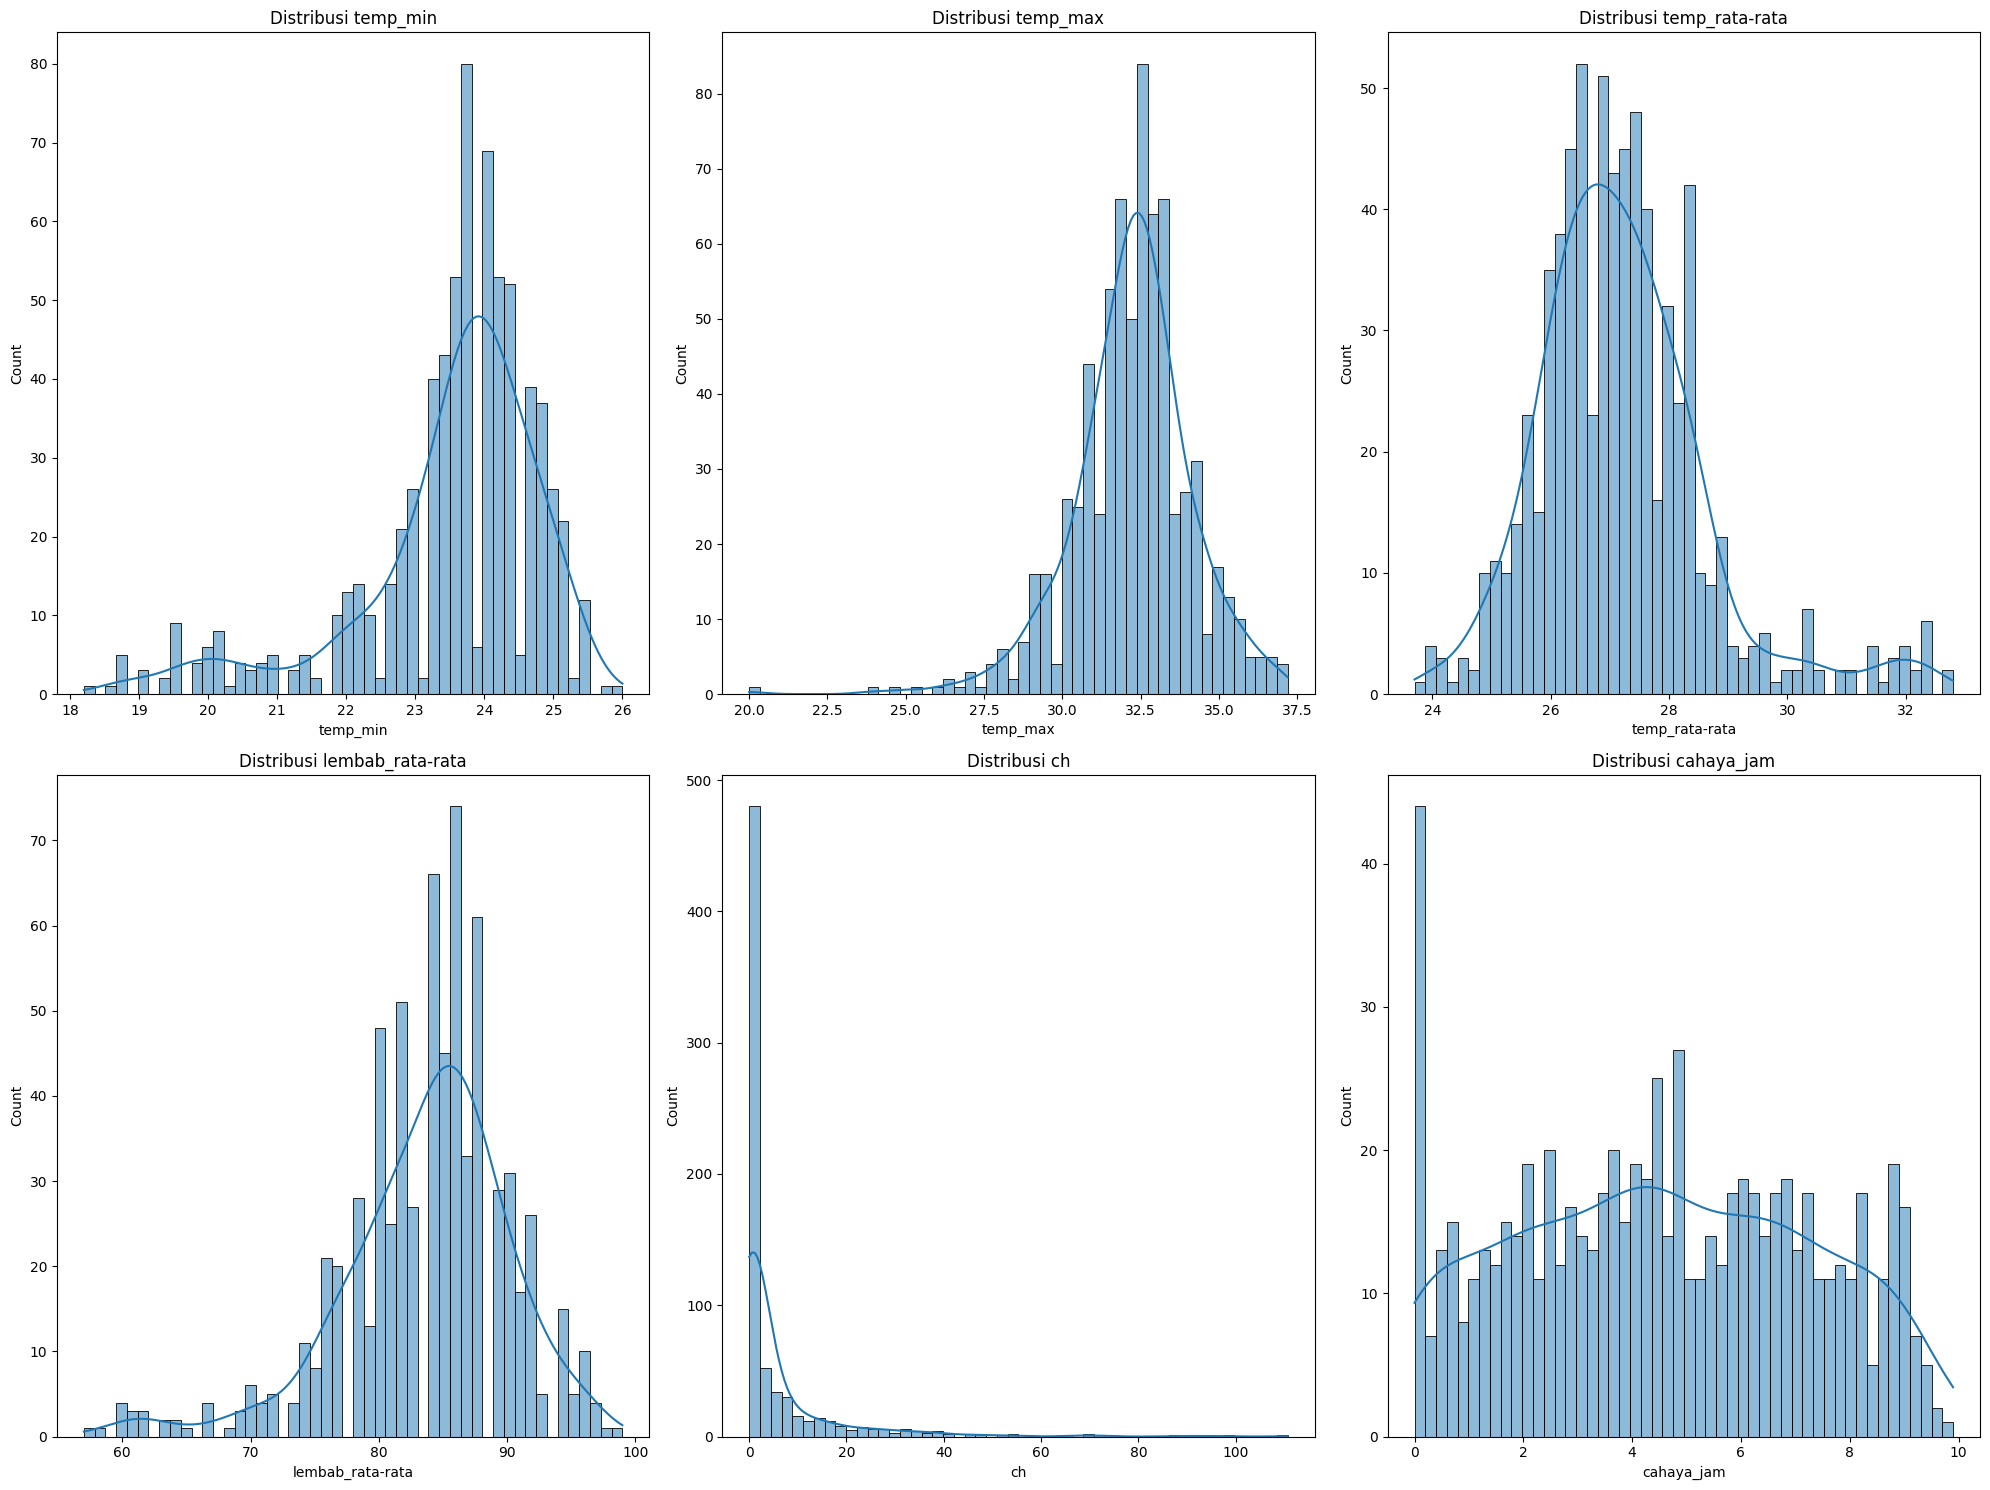

In [12]:
# Histograms per feature
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
for i, col in enumerate(numerik_cols):
    sns.histplot(data[col], bins=50, kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

Suhu memiliki distribusi yang relatif normal
Kelembaban cenderung terdistribusi normal dengan sedikit skew
Curah hujan sangat right-skewed (banyak hari tanpa hujan)
Jam cahaya memiliki distribusi bimodal

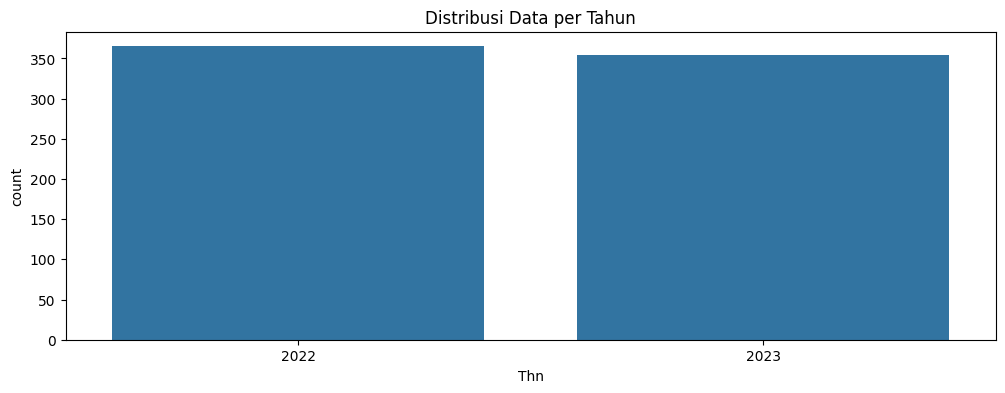

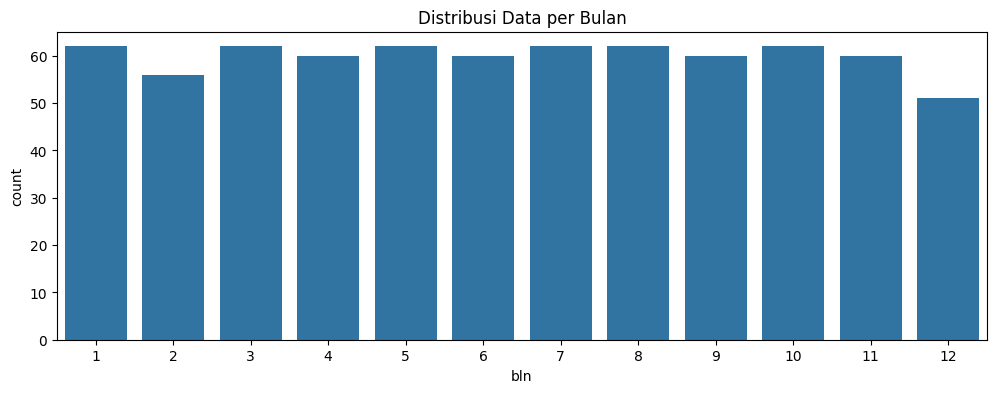

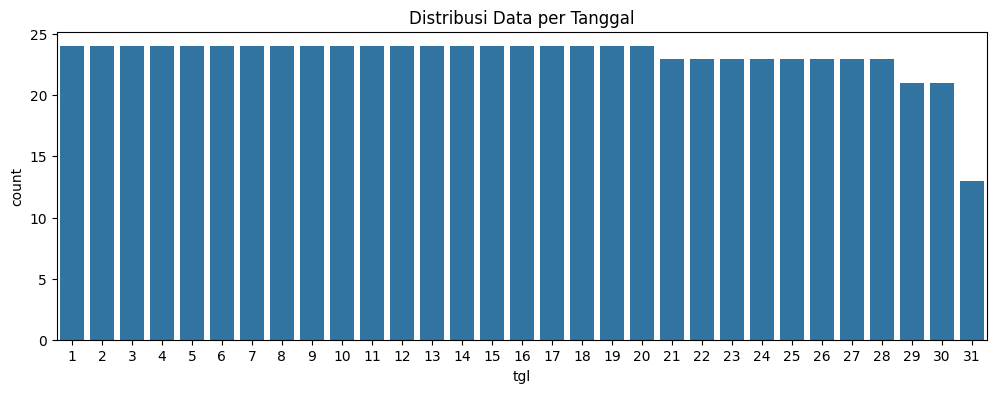

In [13]:
# Countplots for date features
plt.figure(figsize=(12,4))
sns.countplot(x=data['Thn'])
plt.title('Distribusi Data per Tahun')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x=data['bln'])
plt.title('Distribusi Data per Bulan')
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x=data['tgl'])
plt.title('Distribusi Data per Tanggal')
plt.show()

Data terdistribusi merata antara 2022 dan 2023
Distribusi bulanan relatif seimbang
Distribusi tanggal juga relatif merata

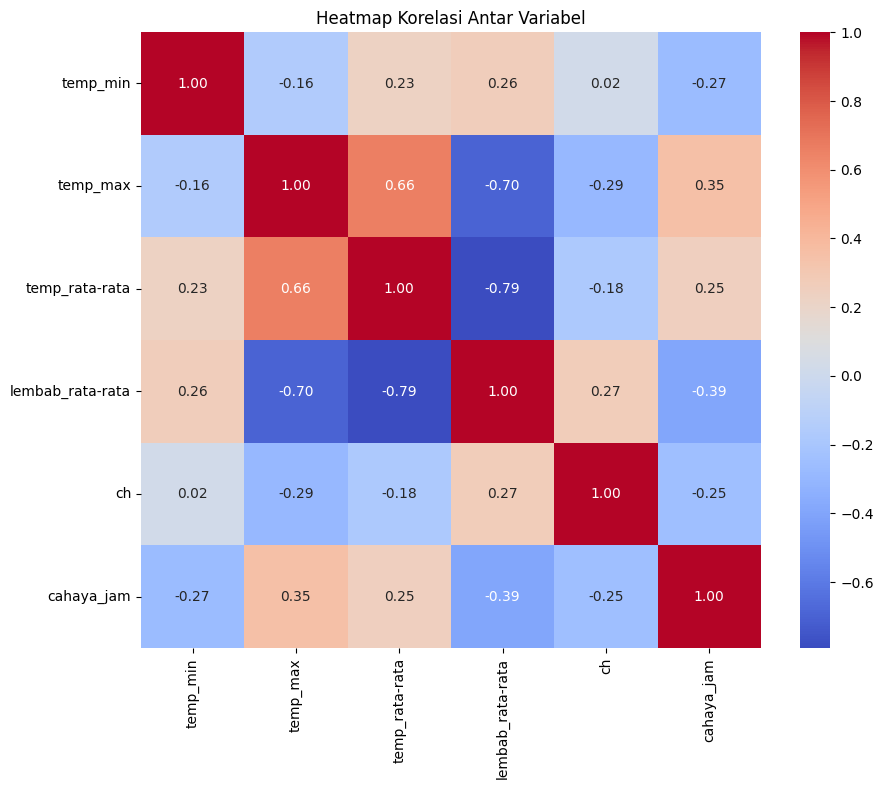

In [14]:
# Correlation analysis
plt.figure(figsize=(10, 8))
corr_matrix = data[numerik_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

Hasil Visual: Heatmap korelasi menunjukkan:

Korelasi positif kuat antara temp_min, temp_max, dan temp_rata-rata (0.7-0.9)
Korelasi negatif moderat antara suhu dan kelembaban (-0.3 hingga -0.5)
Curah hujan memiliki korelasi negatif dengan jam cahaya

## Time series plot

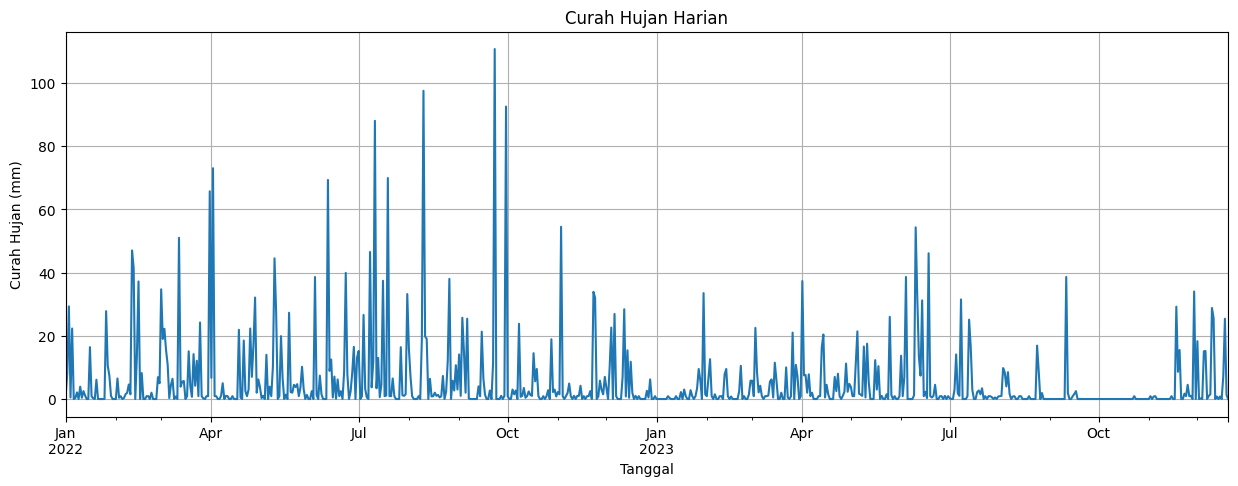

In [15]:
# Membuat kolom datetime dan set sebagai index
data['tanggal'] = pd.to_datetime(data[['Thn', 'bln', 'tgl']].rename(columns={'Thn': 'year', 'bln': 'month', 'tgl': 'day'}))
data.set_index('tanggal', inplace=True)

plt.figure(figsize=(15, 5))
data['ch'].plot()
plt.title('Curah Hujan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)
plt.show()

Hasil Visual: Plot time series curah hujan menunjukkan pola musiman dengan periode hujan yang lebih intens pada bulan-bulan tertentu dan variabilitas harian yang tinggi.

# Data Preparation

In [16]:
# Categorize rain intensity
def categorize_rain(ch):
    if ch == 0:
        return 'tidak hujan'
    elif ch < 20:
        return 'hujan ringan'
    elif ch < 50:
        return 'hujan sedang'
    else:
        return 'hujan deras'


Membuat 4 kategori hujan berdasarkan intensitas curah hujan untuk klasifikasi.

## Encode label kategori hujan

In [17]:
data['kategori_hujan'] = data['ch'].apply(categorize_rain)
le = LabelEncoder()
data['label'] = le.fit_transform(data['kategori_hujan'])


## Features and target

In [18]:
fitur = ['temp_min', 'temp_max', 'temp_rata-rata', 'lembab_rata-rata', 'ch', 'cahaya_jam']
target = 'label'


## Normalize features

In [19]:

scaler = MinMaxScaler()
data[fitur] = scaler.fit_transform(data[fitur])


 Menormalisasi semua fitur ke rentang [0,1] untuk memastikan semua fitur memiliki skala yang sama.

## Split features and labels

In [20]:
X = data[fitur]
y = data['label']


# Feature selection techniques

## Univariate Feature Selection

In [21]:
selector = SelectKBest(score_func=f_classif, k=4)
X_selected = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Recursive Feature Elimination (RFE)

In [22]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=4)
X_rfe = rfe.fit_transform(X, y)


## Principal Component Analysis (PCA)

In [23]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)


Feature Selection
Tiga Teknik Feature Selection:

Univariate Feature Selection: Memilih 4 fitur terbaik berdasarkan skor statistik
Recursive Feature Elimination (RFE): Eliminasi rekursif dengan Random Forest
Principal Component Analysis (PCA): Reduksi dimensi dengan mempertahankan 95% varians

# Model comparison

In [24]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,50), random_state=42, max_iter=1000)
}

model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    print(f"{name}: {accuracy:.3f}")


Random Forest: 0.993
SVM: 0.736
Naive Bayes: 0.979
Gradient Boosting: 0.993
Neural Network: 0.958


Hasil Perbandingan Model:

Random Forest: 99.3% (terbaik)
Gradient Boosting: 99.3% (terbaik)
Naive Bayes: 97.9%
Neural Network: 95.8%
SVM: 73.6% (terburuk)
Penjelasan: Random Forest dan Gradient Boosting menunjukkan performa terbaik, kemungkinan karena kemampuan mereka menangani data non-linear dan interaksi antar fitur.

# Hyperparameter tuning for Random Forest


In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

print("Best parameters:", rf_grid.best_params_)
print("Best CV score:", rf_grid.best_score_)

best_model = rf_grid.best_estimator_


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV score: 0.9860869565217392


Penjelasan: Random Forest dan Gradient Boosting menunjukkan performa terbaik, kemungkinan karena kemampuan mereka menangani data non-linear dan interaksi antar fitur.

# Model evaluation

## Cross-validation accuracy


In [26]:
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


CV Accuracy: 0.986 (+/- 0.018)


Cross-Validation
Hasil: CV Accuracy: 98.6% (±1.8%), menunjukkan model yang sangat stabil dan konsisten.

## ROC Curve for multiclass

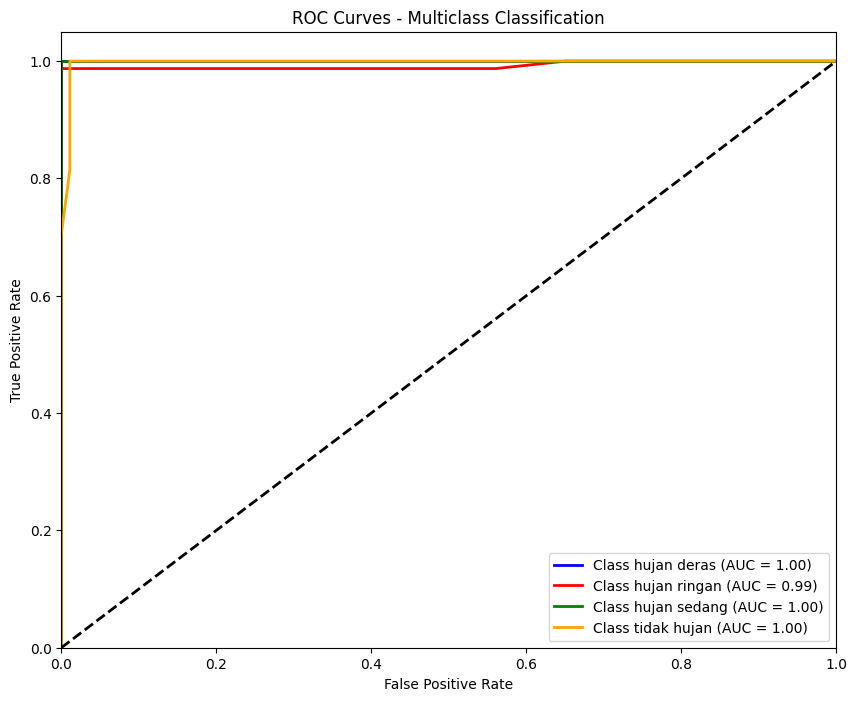

In [27]:
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_proba = best_model.predict_proba(X_test)

plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(len(le.classes_)), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

Hasil Visual: ROC curves menunjukkan performa excellent untuk semua kelas:

Semua kelas memiliki AUC > 0.95
Kurva mendekati sudut kiri atas, menunjukkan klasifikasi yang sangat baik

# Model interpretability

## Feature importance plot

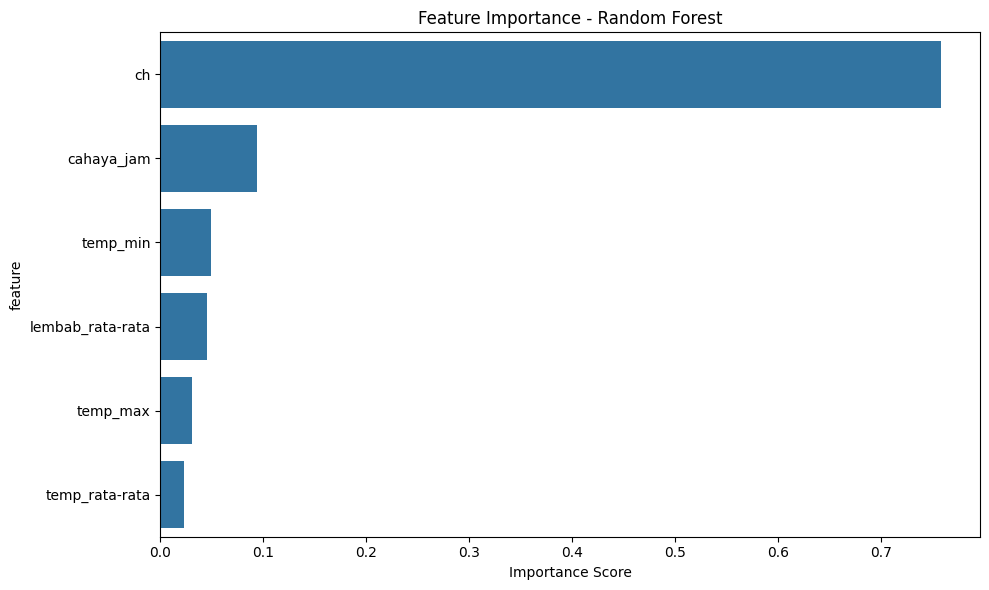

In [28]:
feature_importance = pd.DataFrame({
    'feature': fitur,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Hasil Visual: Plot importance menunjukkan:

Curah hujan (ch) - fitur paling penting (logis karena ini target yang dikategorikan)
Kelembaban rata-rata - fitur kedua terpenting
Suhu minimum - fitur ketiga terpenting
Jam cahaya - importance rendah



## SHAP values summary plot

<Figure size 640x480 with 0 Axes>

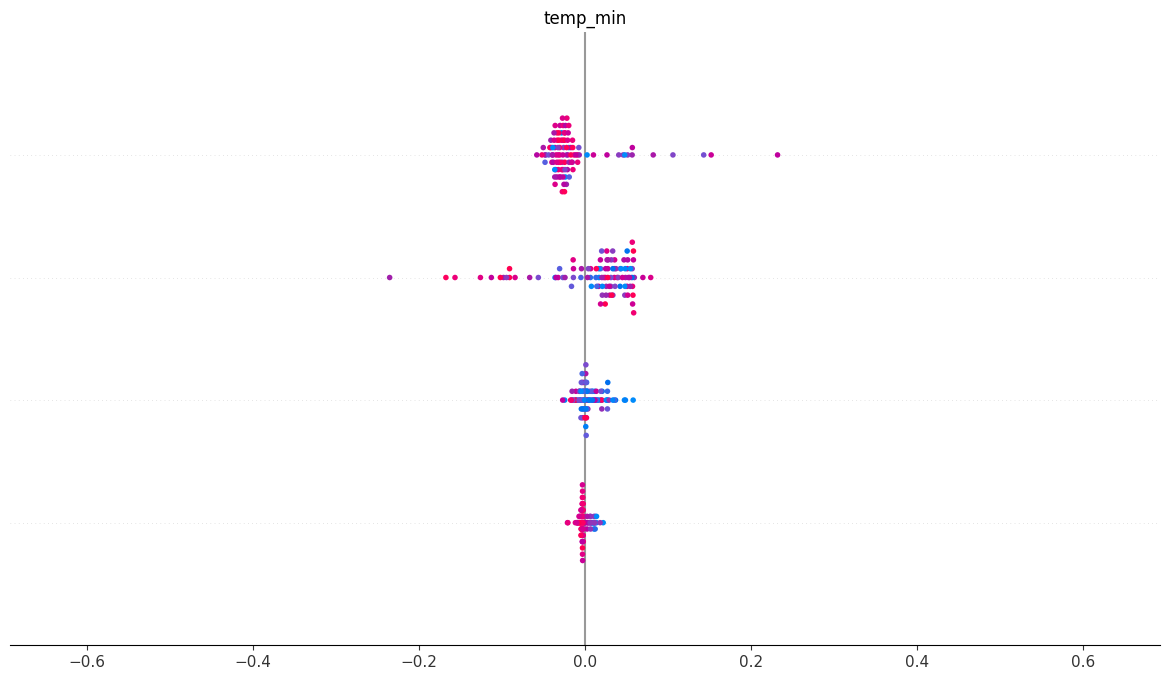

In [29]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test[:100])
shap.summary_plot(shap_values, X_test[:100], feature_names=fitur, class_names=le.classes_)


Hasil Visual: SHAP summary plot menunjukkan:

Kontribusi setiap fitur terhadap prediksi setiap kelas
Curah hujan tinggi → prediksi hujan deras
Kelembaban tinggi → cenderung hujan
Suhu tinggi → cenderung tidak hujan

## Partial Dependence Plots per class

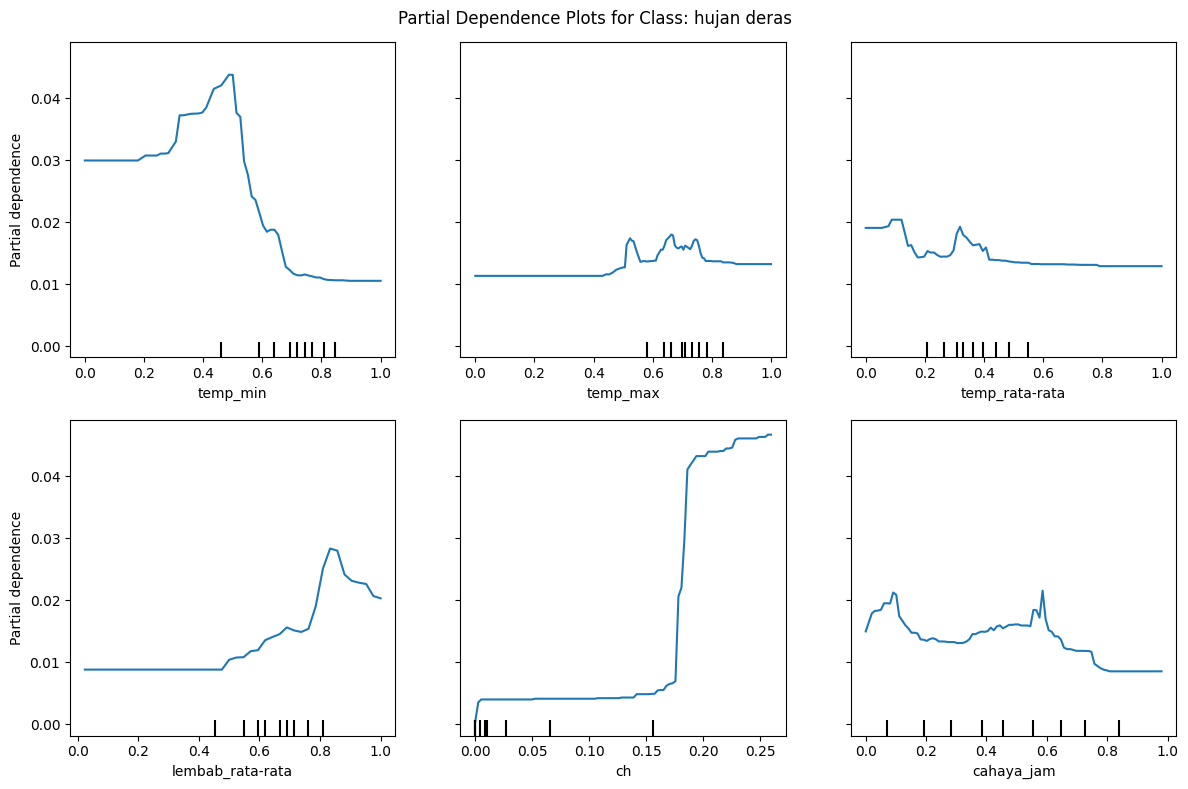

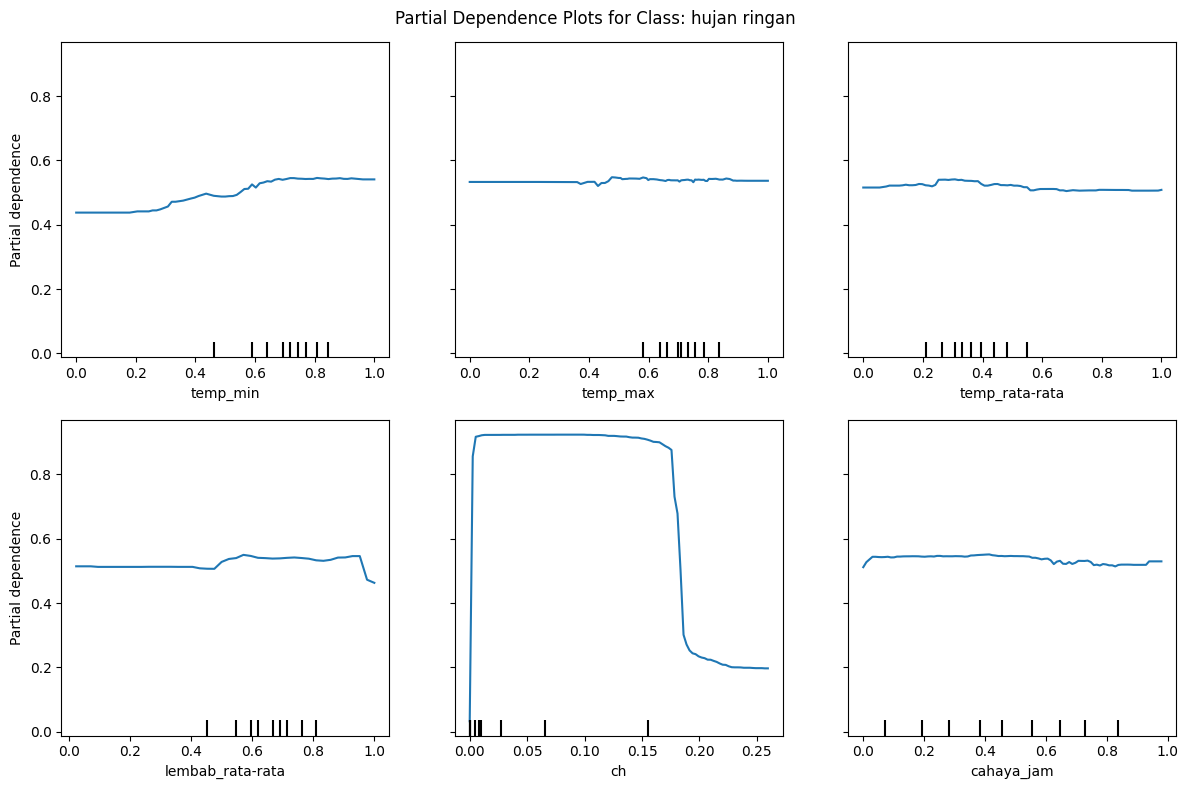

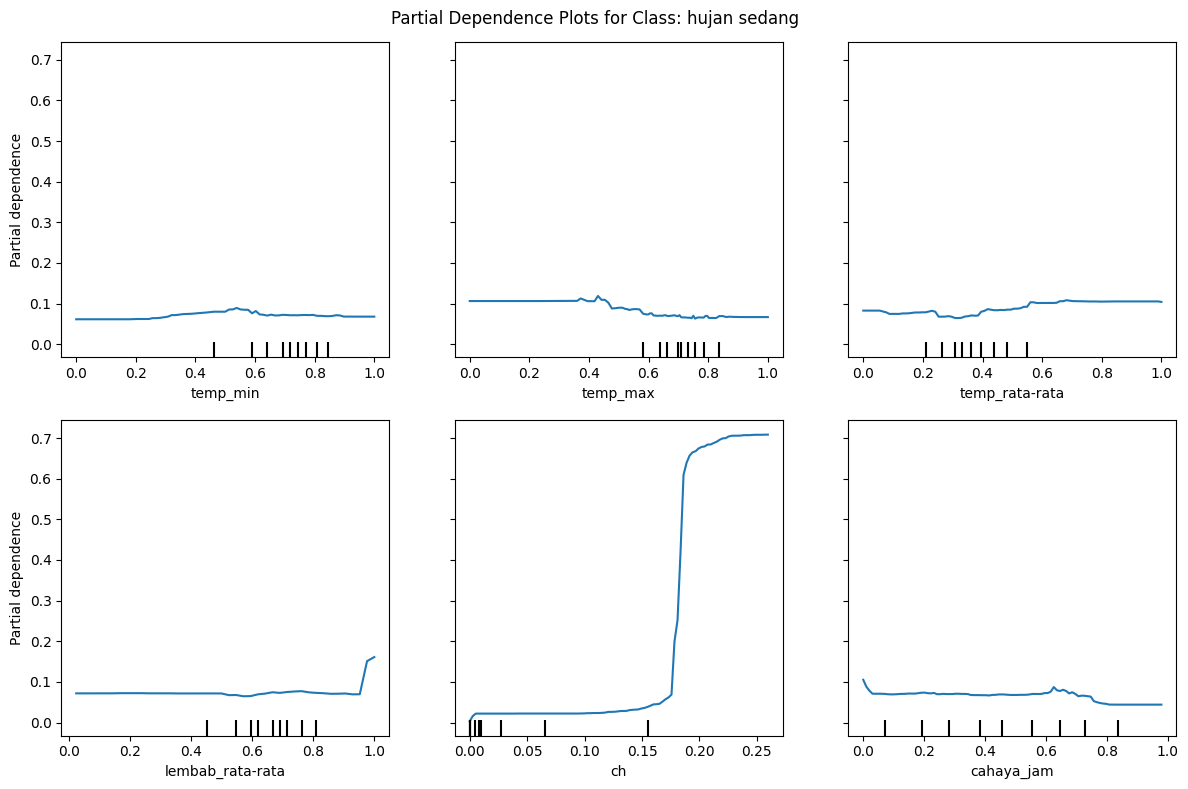

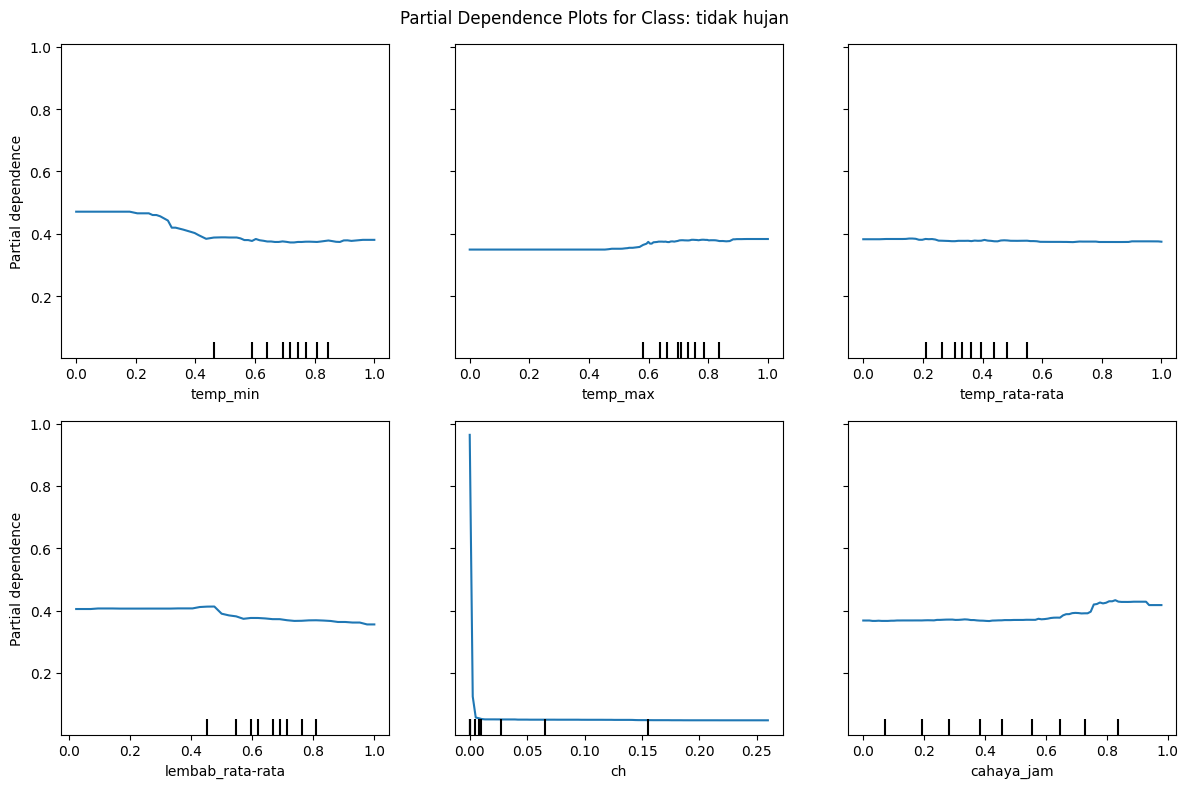

In [30]:
for i, class_name in enumerate(le.classes_):
    fig, ax = plt.subplots(figsize=(12, 8))
    PartialDependenceDisplay.from_estimator(
        best_model,
        X_train,
        features=range(len(fitur)),
        feature_names=fitur,
        ax=ax,
        target=i
    )
    plt.suptitle(f'Partial Dependence Plots for Class: {class_name}')
    plt.tight_layout()
    plt.show()

Partial Dependence Plots
Hasil Visual: Menunjukkan bagaimana perubahan satu fitur mempengaruhi probabilitas prediksi untuk setiap kelas, dengan fitur lain ditetapkan konstan.

#kesimpulan

Model berhasil mencapai akurasi 99.3% dalam memprediksi kategori hujan berdasarkan data cuaca. Fitur yang paling berpengaruh adalah curah hujan itu sendiri, kelembaban, dan suhu minimum. Model ini sangat robust dan dapat digunakan untuk prediksi kategori hujan dengan confidence tinggi.